In [1]:
from datascience import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Introduction to Clustering

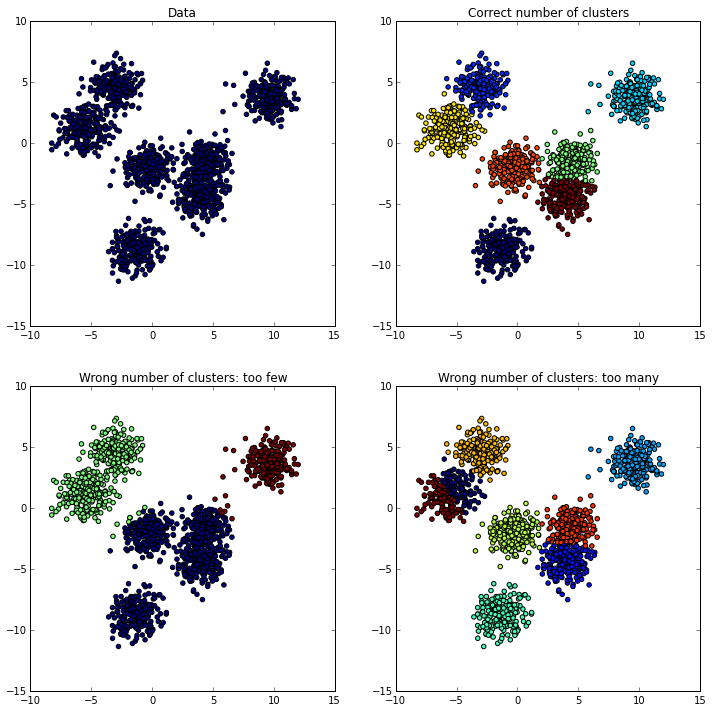

In [2]:
plt.figure(figsize=(12, 12))

n_samples = 1500
n_blobs = 7

random_state = 123


X, y = make_blobs(n_samples=n_samples, centers=n_blobs, random_state=random_state)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=np.ones(n_samples))
plt.title("Data")


# Number of clusters
y_pred = KMeans(n_clusters=n_blobs, random_state=random_state).fit_predict(X)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Correct number of clusters")


y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Wrong number of clusters: too few")


y_pred = KMeans(n_clusters=8, random_state=random_state).fit_predict(X)

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Wrong number of clusters: too many")

# Clustering EV users with similar driving and charging patterns

About the dataset:  #TODO fill this in


In [3]:
soc = Table.read_table('data/soc-m-2015-12-02.csv')
soc

driver,day,0_soc,0.0833333333333333_soc,0.166666666666667_soc,0.25_soc,0.333333333333333_soc,0.416666666666667_soc,0.5_soc,0.583333333333333_soc,0.666666666666667_soc,0.75_soc,0.833333333333333_soc,0.916666666666667_soc,1_soc,1.08333333333333_soc,1.16666666666667_soc,1.25_soc,1.33333333333333_soc,1.41666666666667_soc,1.5_soc,1.58333333333333_soc,1.66666666666667_soc,1.75_soc,1.83333333333333_soc,1.91666666666667_soc,2_soc,2.08333333333333_soc,2.16666666666667_soc,2.25_soc,2.33333333333333_soc,2.41666666666667_soc,2.5_soc,2.58333333333333_soc,2.66666666666667_soc,2.75_soc,2.83333333333333_soc,2.91666666666667_soc,3_soc,3.08333333333333_soc,3.16666666666667_soc,3.25_soc,3.33333333333333_soc,3.41666666666667_soc,3.5_soc,3.58333333333333_soc,3.66666666666667_soc,3.75_soc,3.83333333333333_soc,3.91666666666667_soc,4_soc,4.08333333333333_soc,4.16666666666667_soc,4.25_soc,4.33333333333333_soc,4.41666666666667_soc,4.5_soc,4.58333333333333_soc,4.66666666666667_soc,4.75_soc,4.83333333333333_soc,4.91666666666667_soc,5_soc,5.08333333333333_soc,5.16666666666667_soc,5.25_soc,5.33333333333333_soc,5.41666666666667_soc,5.5_soc,5.58333333333333_soc,5.66666666666667_soc,5.75_soc,5.83333333333333_soc,5.91666666666667_soc,6_soc,6.08333333333333_soc,6.16666666666667_soc,6.25_soc,6.33333333333333_soc,6.41666666666667_soc,6.5_soc,6.58333333333333_soc,6.66666666666667_soc,6.75_soc,6.83333333333333_soc,6.91666666666667_soc,7_soc,7.08333333333333_soc,7.16666666666667_soc,7.25_soc,7.33333333333333_soc,7.41666666666667_soc,7.5_soc,7.58333333333333_soc,7.66666666666667_soc,7.75_soc,7.83333333333333_soc,7.91666666666667_soc,8_soc,8.08333333333333_soc,8.16666666666667_soc,8.25_soc,8.33333333333333_soc,8.41666666666667_soc,8.5_soc,8.58333333333333_soc,8.66666666666667_soc,8.75_soc,8.83333333333333_soc,8.91666666666667_soc,9_soc,9.08333333333333_soc,9.16666666666667_soc,9.25_soc,9.33333333333333_soc,9.41666666666667_soc,9.5_soc,9.58333333333333_soc,9.66666666666667_soc,9.75_soc,9.83333333333333_soc,9.91666666666667_soc,10_soc,10.0833333333333_soc,10.1666666666667_soc,10.25_soc,10.3333333333333_soc,10.4166666666667_soc,10.5_soc,10.5833333333333_soc,10.6666666666667_soc,10.75_soc,10.8333333333333_soc,10.9166666666667_soc,11_soc,11.0833333333333_soc,11.1666666666667_soc,11.25_soc,11.3333333333333_soc,11.4166666666667_soc,11.5_soc,11.5833333333333_soc,11.6666666666667_soc,11.75_soc,11.8333333333333_soc,11.9166666666667_soc,12_soc,12.0833333333333_soc,12.1666666666667_soc,12.25_soc,12.3333333333333_soc,12.4166666666667_soc,12.5_soc,12.5833333333333_soc,12.6666666666667_soc,12.75_soc,12.8333333333333_soc,12.9166666666667_soc,13_soc,13.0833333333333_soc,13.1666666666667_soc,13.25_soc,13.3333333333333_soc,13.4166666666667_soc,13.5_soc,13.5833333333333_soc,13.6666666666667_soc,13.75_soc,13.8333333333333_soc,13.9166666666667_soc,14_soc,14.0833333333333_soc,14.1666666666667_soc,14.25_soc,14.3333333333333_soc,14.4166666666667_soc,14.5_soc,14.5833333333333_soc,14.6666666666667_soc,14.75_soc,14.8333333333333_soc,14.9166666666667_soc,15_soc,15.0833333333333_soc,15.1666666666667_soc,15.25_soc,15.3333333333333_soc,15.4166666666667_soc,15.5_soc,15.5833333333333_soc,15.6666666666667_soc,15.75_soc,15.8333333333333_soc,15.9166666666667_soc,16_soc,16.0833333333333_soc,16.1666666666667_soc,16.25_soc,16.3333333333333_soc,16.4166666666667_soc,16.5_soc,16.5833333333333_soc,16.6666666666667_soc,16.75_soc,16.8333333333333_soc,16.9166666666667_soc,17_soc,17.0833333333333_soc,17.1666666666667_soc,17.25_soc,17.3333333333333_soc,17.4166666666667_soc,17.5_soc,17.5833333333333_soc,17.6666666666667_soc,17.75_soc,17.8333333333333_soc,17.9166666666667_soc,18_soc,18.0833333333333_soc,18.1666666666667_soc,18.25_soc,18.3333333333333_soc,18.4166666666667_soc,18.5_soc,18.5833333333333_soc,18.6666666666667_soc,18.75_soc,18.8333333333333_soc,18.9166666666667_soc,19_soc,19.0833333333333_soc,19.1666666666667_soc,19.25_soc,19.3333333333333_soc,19.4166666666667_soc,19.5_soc,19.5833333333333_soc,19.6666666666

# Preprocessing and choosing number of clusters

#TODO fill this in

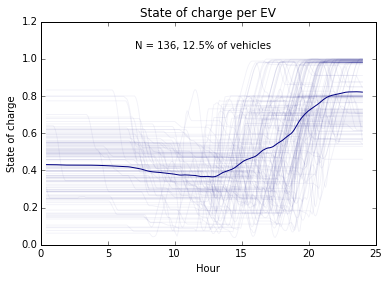

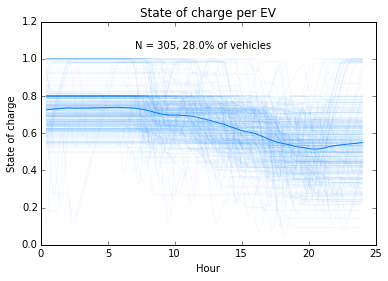

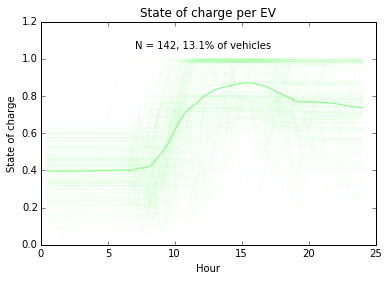

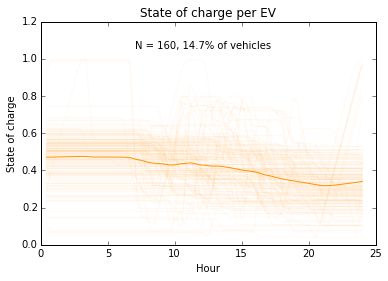

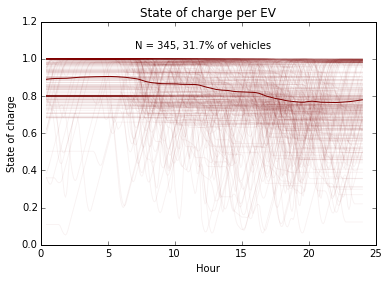

In [4]:
n_clusters=5
rolling_window = 6

#get color map array
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=n_clusters-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorVals = [scalarMap.to_rgba(i) for i in range(n_clusters)]


soc_tuesday = soc.where('day',3)
X = soc_tuesday.drop(['driver','day']).to_df()
X_rolling = (pd.rolling_mean(X.T,window=rolling_window)[rolling_window-1::]).T

estimator = KMeans(n_clusters=n_clusters)
estimator.fit(X_rolling)

    
for i in range(n_clusters):
    x_ticks = np.arange(rolling_window-1,289)/12.
    plt.figure()
    data = X_rolling[estimator.labels_==i]
    n = len(data)
    for j in range(data.shape[0]):
        plt.plot(x_ticks,data.T[data.index[j]], color=colorVals[i], alpha=.05)
    plt.plot(x_ticks,np.mean(data), color=colorVals[i])
    
    plt.xlabel('Hour')
    plt.ylabel('State of charge')
    plt.ylim(0,1.2)
    plt.title('State of charge per EV')
    textstr = 'N = %i, %.1f%% of vehicles'%(n,float(n*100/len(X_rolling)))
    plt.text(7, 1.1, textstr, fontsize=10,verticalalignment='top')



# Overlaying the clusters and plotting the derivatives


In [7]:
def get_slope(y, x):
    dys = y[1:]-y[:-1]
    dxs = x[1:]-x[:-1]
    return dys/dxs


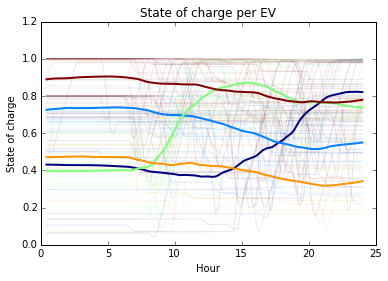

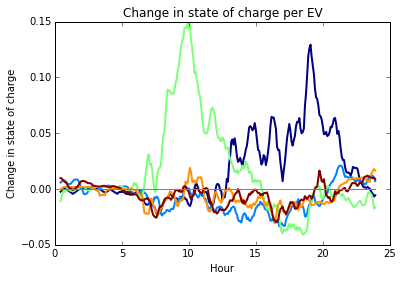

In [8]:
for i in range(100):
    plt.plot(x_ticks, X_rolling.T[i], color = colorVals[estimator.labels_[i]], alpha=.1)
    
for i in range(n_clusters):
    plt.plot(x_ticks, np.mean(X_rolling[estimator.labels_==i]), 
             color=colorVals[i], linewidth=2)

plt.xlabel('Hour')
plt.ylabel('State of charge')
plt.title('State of charge per EV')


#Plot the derivative
plt.figure()
for i in range(n_clusters):
    dy_dx = get_slope(np.array(np.mean(X_rolling[estimator.labels_==i])), x_ticks)
    plt.plot(x_ticks[:-1], dy_dx, color=colorVals[i], linewidth=2)
    
plt.plot(x_ticks[:-1], np.zeros(len(x_ticks[:-1])), color = 'grey')
plt.xlabel('Hour')
plt.ylabel('Change in state of charge')
plt.title('Change in state of charge per EV')


# Clustering behavior for the whole workweek

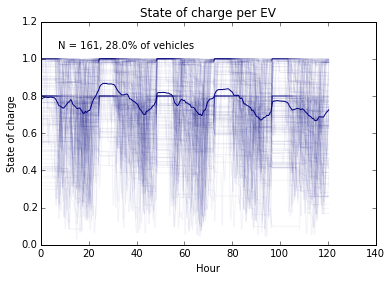

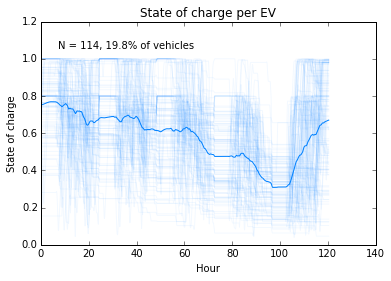

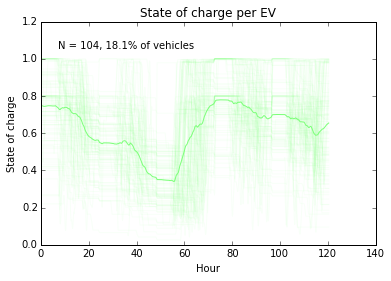

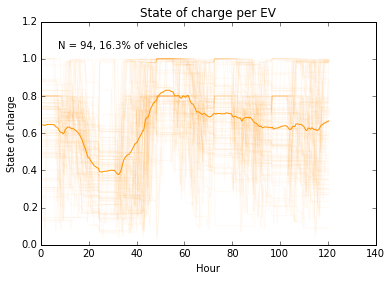

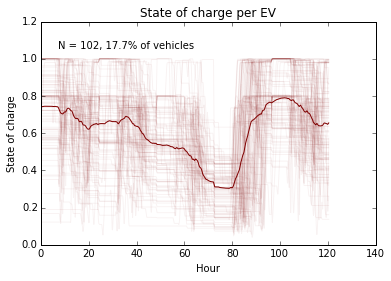

In [9]:
week_soc = Table.read_table('data/workweek_soc.csv')
week_df = week_soc.drop('driver').to_df()

n_clusters=5
rolling_window = 6

#get color map array
jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=n_clusters-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
colorVals = [scalarMap.to_rgba(i) for i in range(n_clusters)]


X_rolling = (pd.rolling_mean(week_df.T,window=rolling_window)[rolling_window-1::]).T

estimator = KMeans(n_clusters=n_clusters)
estimator.fit(X_rolling)

    
for i in range(n_clusters):
    x_ticks = np.arange(rolling_window-1,289*5)/12.
    plt.figure()
    data = X_rolling[estimator.labels_==i]
    n = len(data)
    for j in range(data.shape[0]):
        plt.plot(x_ticks,data.T[data.index[j]], color=colorVals[i], alpha=.05)
    plt.plot(x_ticks,np.mean(data), color=colorVals[i])
    
    plt.xlabel('Hour')
    plt.ylabel('State of charge')
    plt.title('State of charge per EV')
    textstr = 'N = %i, %.1f%% of vehicles'%(n,float(n*100/len(X_rolling)))
    plt.text(7, 1.1, textstr, fontsize=10,verticalalignment='top')


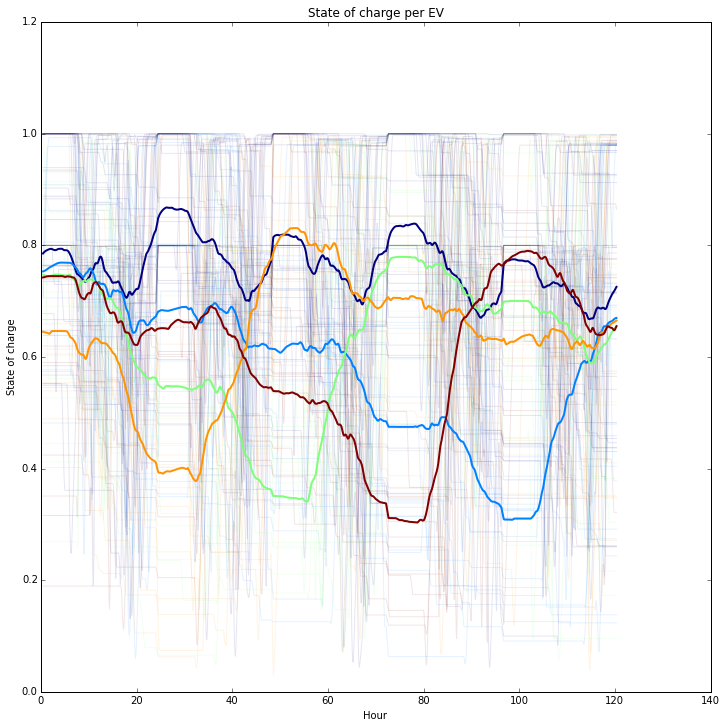

In [10]:
plt.figure(figsize=(12,12))
for i in range(100):
    plt.plot(x_ticks, X_rolling.T[i], color = colorVals[estimator.labels_[i]], alpha=.1)
    
for i in range(n_clusters):
    plt.plot(x_ticks, np.mean(X_rolling[estimator.labels_==i]), color=colorVals[i], linewidth=2)

    
plt.xlabel('Hour')
plt.ylabel('State of charge')
plt.title('State of charge per EV')
